<a href="https://colab.research.google.com/github/VMohanraj27/ScofieldReese/blob/main/Tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.applications  import VGG
conv_base = VGG()

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255
                                  )

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Training',
                                                batch_size=32,
                                                class_mode='categorical',
                                                target_size=(64,64))

Found 2880 images belonging to 4 classes.


In [8]:
testing_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Testing',
                                              batch_size=32,
                                              class_mode='categorical',
                                              target_size=(64,64))

Found 394 images belonging to 4 classes.


In [9]:
imgs,labels = next(training_set)
num_classes = len(training_set.class_indices)

In [10]:
def plot_images(images_arr):
    fig,axes= plt.subplots(1,12,figsize=(32,32))
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

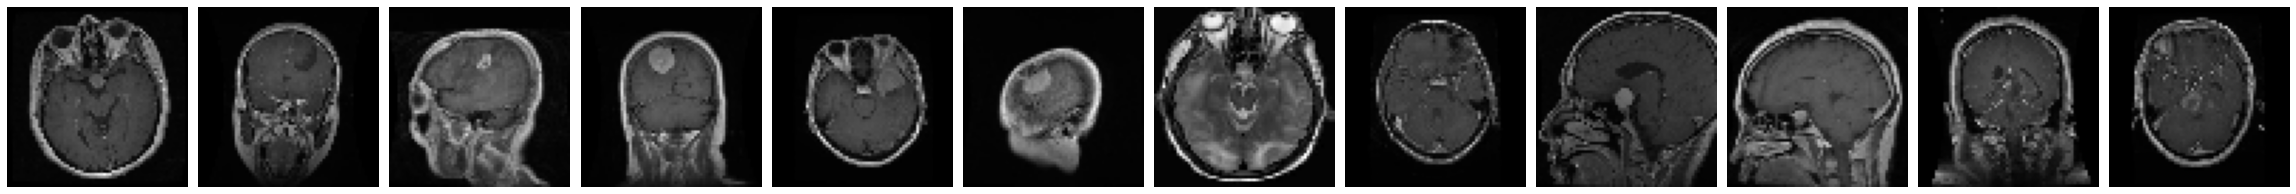

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [11]:
plot_images(imgs)
print(labels)

In [12]:
model = Sequential()

In [14]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [15]:
model.add(Flatten())

Fully Connected Neural Network

In [16]:
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=64,activation='relu'))

model.add(Dense(num_classes,activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['Accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [19]:
history = model.fit(training_set,
          steps_per_epoch= training_set.n//training_set.batch_size,
          epochs=25,
          validation_data=testing_set)

Epoch 1/25
90/90 [==============================] - 395s 4s/step - loss: 1.0481 - Accuracy: 0.5399 - val_loss: 2.0593 - val_Accuracy: 0.2589
Epoch 2/25
90/90 [==============================] - 16s 177ms/step - loss: 0.7832 - Accuracy: 0.6712 - val_loss: 1.8123 - val_Accuracy: 0.4797
Epoch 3/25
90/90 [==============================] - 16s 177ms/step - loss: 0.5776 - Accuracy: 0.7715 - val_loss: 2.1215 - val_Accuracy: 0.4391
Epoch 4/25
90/90 [==============================] - 16s 176ms/step - loss: 0.4898 - Accuracy: 0.8007 - val_loss: 2.0464 - val_Accuracy: 0.5431
Epoch 5/25
90/90 [==============================] - 16s 177ms/step - loss: 0.3627 - Accuracy: 0.8656 - val_loss: 2.6344 - val_Accuracy: 0.5508
Epoch 6/25
90/90 [==============================] - 16s 176ms/step - loss: 0.2916 - Accuracy: 0.8896 - val_loss: 2.6862 - val_Accuracy: 0.5330
Epoch 7/25
90/90 [==============================] - 16s 176ms/step - loss: 0.2623 - Accuracy: 0.9003 - val_loss: 3.0780 - val_Accuracy: 0.6497
E

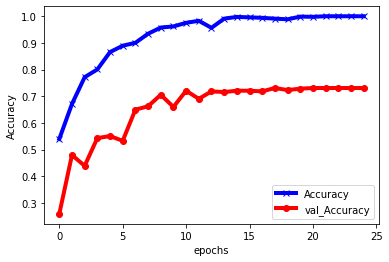

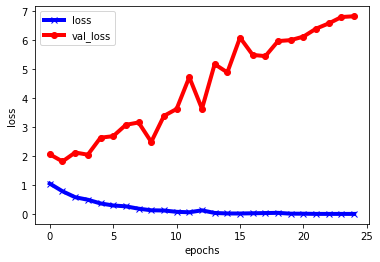

In [20]:
def plot_graphs(history,string):
    plt.plot(history.history[string], 'b-x', linewidth=4)
    plt.plot(history.history['val_'+string], 'r-o', linewidth=4)
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()
    
plot_graphs(history,"Accuracy")
plot_graphs(history,"loss")

In [ ]:
from keras import models
model = models.load_model('Brain_tumor',compile=False)

OSError: SavedModel file does not exist at: Brain_tumor\{saved_model.pbtxt|saved_model.pb}

In [ ]:
import os

In [ ]:
test_filenames = os.listdir(r'/content/drive/MyDrive/Testing')
test_df = pd.DataFrame({
    "filename" : test_filenames
})

In [ ]:
total_test = len(test_df)
print("Total number of images in test data",total_test)

Total number of images in test data 34


In [ ]:
test1_datagen = ImageDataGenerator(rescale=1./255)
batch_size= 15

In [ ]:
test1_generator = test1_datagen.flow_from_dataframe(test_df,r'/content/drive/MyDrive/Testing',x_col="filename"     
                
                                                    ,target_size=(64,64),batch_size=batch_size,shuffle=False,class_mode=None)

Found 34 validated image filenames.


In [ ]:
predict = model.predict(test1_generator, steps = np.ceil(total_test/batch_size))
print("Number of predicted images:", len(predict), "\n")
print(" 0:no_tumor      1:pituitary_tumor     2:meningioma_tumor    3:glioma_tumor  \n\n",predict,"\n")

Number of predicted images: 34 

 0:no_tumor      1:pituitary_tumor     2:meningioma_tumor    3:glioma_tumor  

 [[2.04951890e-16 2.42356091e-09 1.00000000e+00 2.96764452e-15]
 [4.40710395e-15 1.33733067e-06 9.99998689e-01 1.26005807e-15]
 [1.39074435e-15 1.00903444e-05 9.99989867e-01 1.51624407e-11]
 [4.77036123e-15 2.74343428e-08 9.99998331e-01 1.59191438e-06]
 [2.52391122e-16 1.28959427e-05 9.99987125e-01 1.62376388e-16]
 [1.06258187e-15 1.99790262e-02 9.80020940e-01 9.66337326e-16]
 [8.57642088e-16 1.61750023e-07 9.99999881e-01 1.41568936e-14]
 [1.48176707e-06 6.00689746e-05 3.19578277e-04 9.99618888e-01]
 [1.75096635e-14 4.19746824e-02 9.58025336e-01 2.60155910e-13]
 [8.44420000e-23 9.39187128e-09 1.00000000e+00 2.32741996e-16]
 [1.59900926e-10 3.10850441e-01 6.88211679e-01 9.37900040e-04]
 [8.05644138e-19 8.43327343e-01 1.56672731e-01 4.17221102e-08]
 [1.70507832e-07 6.08970970e-02 9.39102590e-01 1.06500181e-07]
 [6.95704783e-09 7.09557772e-01 2.90440887e-01 1.23538916e-06]
 [4.3

In [ ]:
test_df['category'] = np.argmax(predict, axis=1)
print(test_df['category'][0:35])

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     3
8     2
9     2
10    2
11    1
12    2
13    1
14    2
15    1
16    2
17    1
18    1
19    2
20    2
21    2
22    2
23    1
24    2
25    1
26    1
27    2
28    1
29    1
30    2
31    1
32    1
33    1
Name: category, dtype: int64


In [ ]:
print(training_set.class_indices)
print(testing_set.class_indices, "\n")

label_map = dict((v,k) for k,v in training_set.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
print(label_map, "\n")

print(test_df['category'][0:4], "\n")
print(test_df['category'][0:3])

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3} 

{0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'} 

0    no_tumor
1    no_tumor
2    no_tumor
3    no_tumor
Name: category, dtype: object 

0    no_tumor
1    no_tumor
2    no_tumor
Name: category, dtype: object


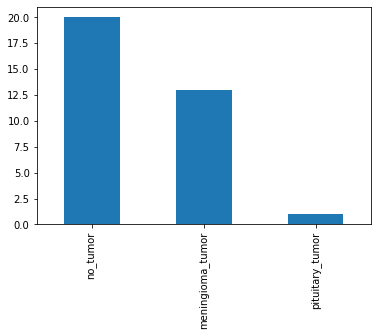

In [ ]:
test_df['category'].value_counts().plot.bar()
from tensorflow.keras.utils import load_img

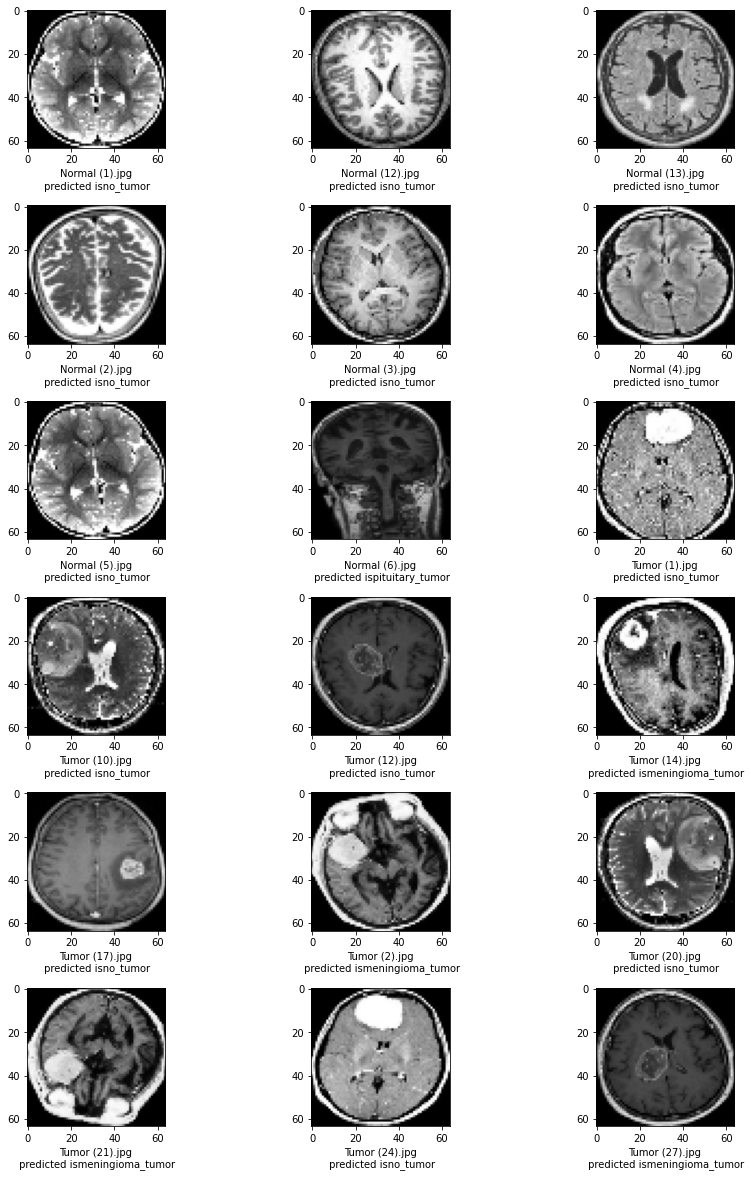

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(r"/content/drive/MyDrive/Testing"+filename, target_size=(64,64))
    plt.subplot(9,3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + "\n predicted is" + "{}".format(category))
plt.tight_layout()
plt.show()

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('Catdogcar1.csv', index=False)

submission_df.head(300)